In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [ ]:
(train_images, _), (test_images, _) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

In [ ]:
def display_image(image, title):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

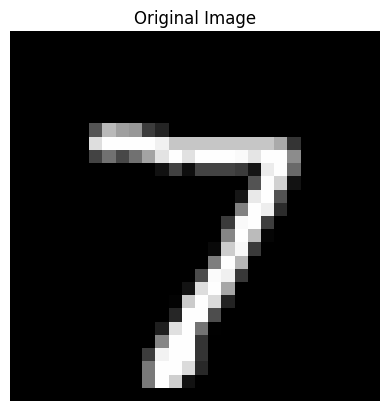

In [ ]:
original_image = test_images[0]
display_image(original_image, "Original Image")

In [ ]:
def diffusion_model(image, steps=100, noise_level=0.1):
    diffused_image = np.copy(image)

    for step in range(steps):
        # Add Gaussian noise to the image
        noise = np.random.normal(loc=0, scale=noise_level, size=image.shape)
        diffused_image += noise

        # Clip pixel values to be between 0 and 1
        diffused_image = np.clip(diffused_image, 0, 1)

        # Display intermediate images every 10 steps
        if step % 10 == 0:
            display_image(diffused_image, f"Diffusion Step {step}")

    return diffused_image


In [ ]:
def reverse_diffusion_model(forward_diffused_image, num_steps=100, step_size=0.000001):
    reverse_diffused_image = np.copy(forward_diffused_image)

    for i in range(num_steps):
        # Add your reverse diffusion process here
        # Example: reverse_diffused_image = reverse_diffusion(reverse_diffused_image, step_size)

        # Print progress every 5 steps
        if i % 20 == 0:
            print("i =", i, "\n")
            display_image(reverse_diffused_image, f"Reverse Diffusion Step {i}")

    return reverse_diffused_image

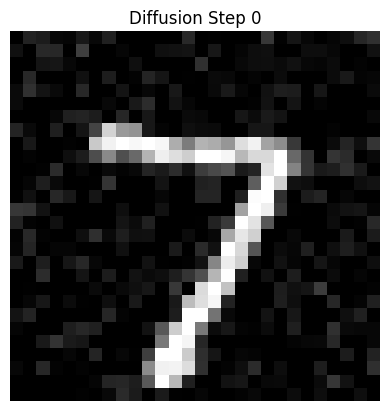

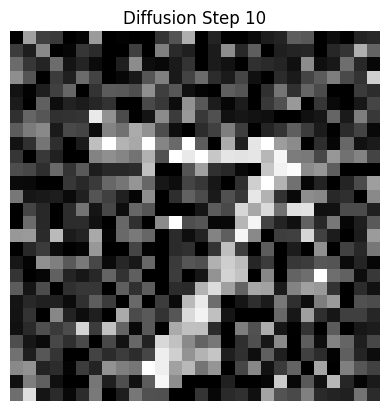

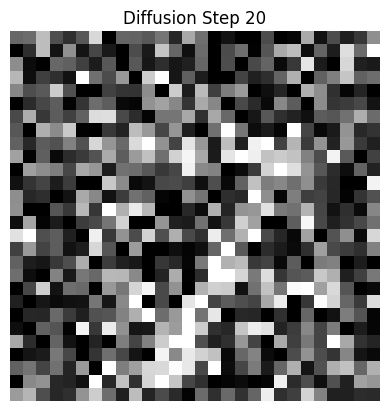

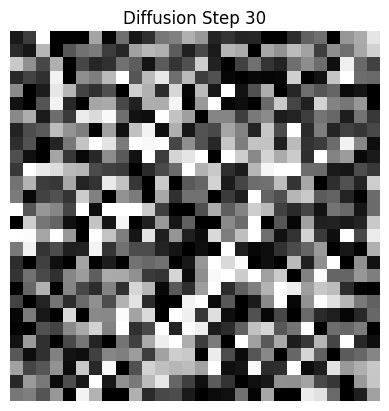

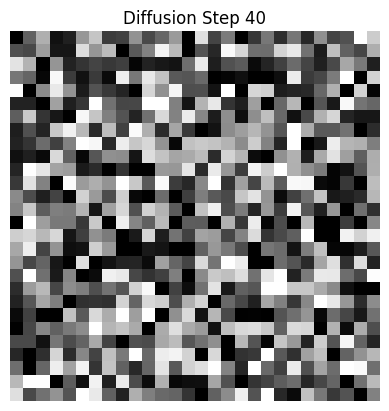

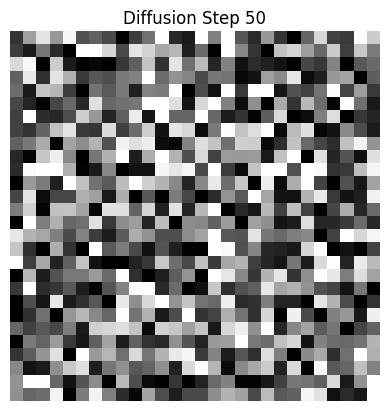

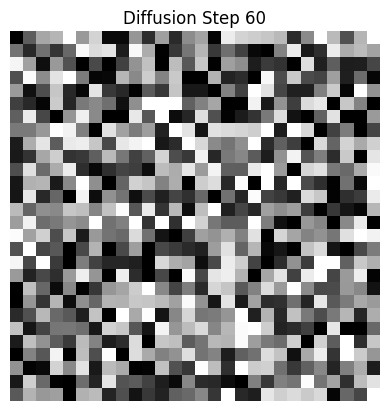

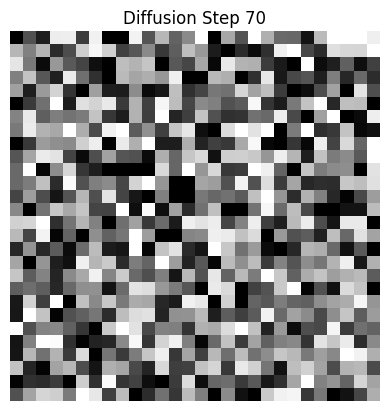

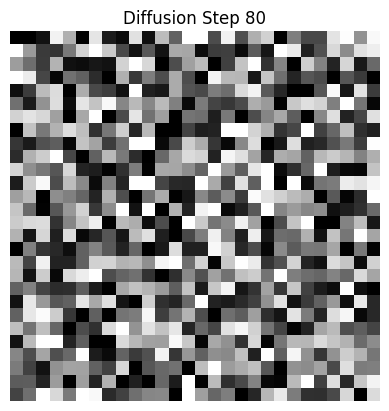

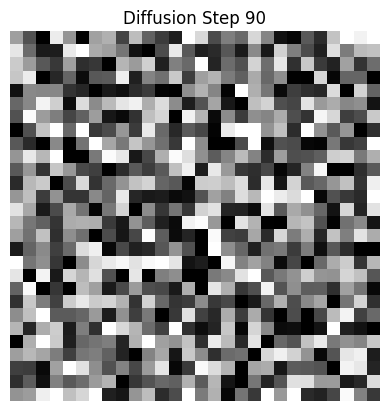

i = 0 



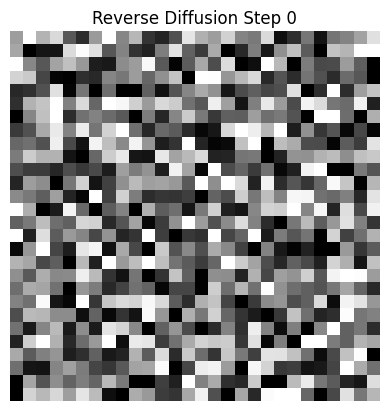

i = 20 



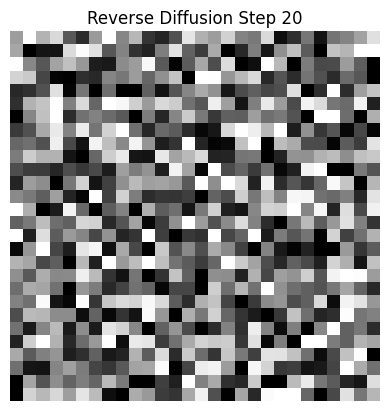

i = 40 



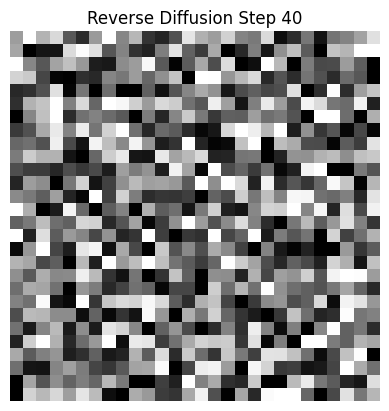

i = 60 



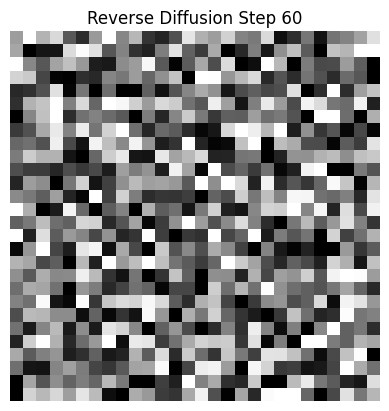

i = 80 



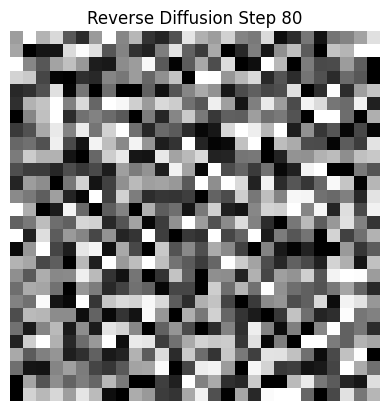

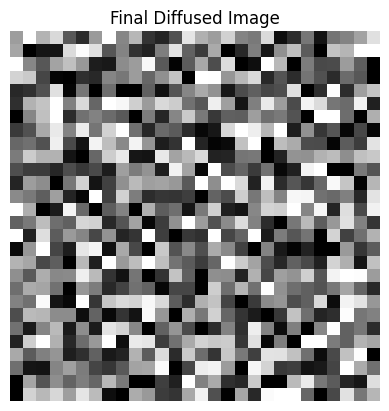

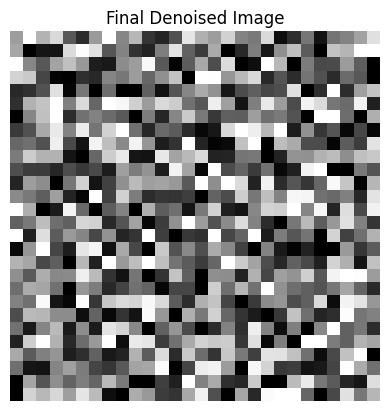

In [ ]:
diffused_result = diffusion_model(original_image)

# Apply reverse diffusion model to the diffused image (denoising)
denoised_result = reverse_diffusion_model(diffused_result)

# Display the final diffused and denoised images
display_image(diffused_result, "Final Diffused Image")
display_image(denoised_result, "Final Denoised Image")